# Домашня робота №10

# Закон великих чисел, метод Монте-Карло, центральна гранична теорема

Деякі задачі взяті з підручника

*Збірник задач з теорії ймовірностей та математичної статистики: навч. посібник / В.В. Голомозий, М.В. Карташов, К.В. Ральченко. – К.: Видавничо-поліграфічний центр «Київський університет», 2015. – 366 с.*

Електронну версію збірника можна знайти [за посиланням](http://probability.univ.kiev.ua/userfiles/kmv/gkr-problems.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Закон великих чисел (посилений)

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu$.
Тоді
$$
\frac{\xi_1 + \ldots + \xi_n}{n} \to \mu, \qquad n \to \infty, \quad \text{м.н.}
$$
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.

### 1.1 Геометричний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Geom(p), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $p = 0.05, 0.25, 0.5, 0.75, 0.95$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $p$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

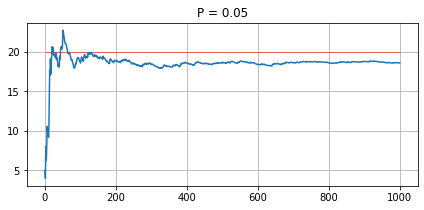

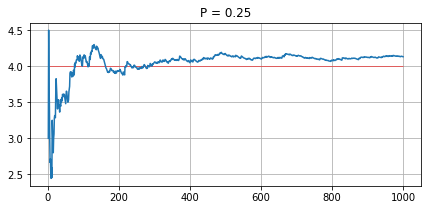

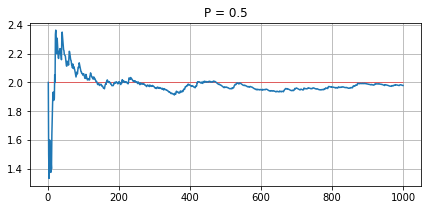

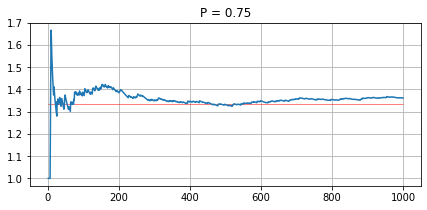

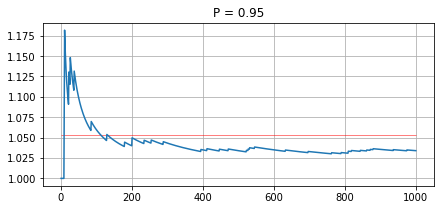

In [2]:
from scipy.stats import geom


lst = [0.05, 0.25, 0.5, 0.75, 0.95]

for i in lst:
    f = plt.gcf()
    f.set_size_inches(7, 3)
     
    x = geom(i)
    h = x.rvs(size=1000)

    c = h.cumsum()
    N = np.arange(1, 1001)

    plt.plot(N, c / N)
    plt.hlines(1 / i, 0, len(N), 'r', linewidth=0.5)
    plt.title('P = {}'.format(i))
    plt.grid()
    plt.show()

### 1.2 Рівномірний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Uniform(a, b), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожної пари параметрів $[a, b] = [0, 1], [-1, 1], [-2, 5]$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожної пари $[a, b]$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

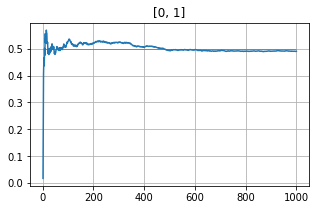

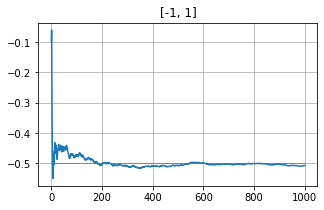

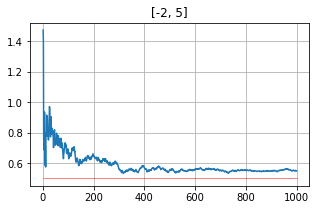

In [3]:
from scipy.stats import uniform


lst = [(0, 1), (-1, 1), (-2, 5)]

for i, j in lst:
    f = plt.gcf()
    f.set_size_inches(5, 3)

    kci = uniform(i, j)

    r = kci.rvs(size = 1000)

    c = r.cumsum()
    N = np.arange(1, 1001)
    a = c / N

    plt.plot(N, a)
    
    plt.hlines(kci.expect(lambda i: i), 0, len(N), 'r', linewidth=0.5)
    plt.title(f'[{i}, {j}]')
    plt.grid()
    plt.show()

### 1.3 Задача 1.18.19

Випадкові величини $(\epsilon_n, n \geq -m)$ незалежні однаково розподілені та квадратично інтегровні.
Довести, що для величин $\xi_n = \sum_{k=0}^{m} c_k \epsilon_{n-k}$
виконується закон великих чисел, де $c_k$ &mdash; довільні сталі.

Нехай $\epsilon_n \sim N(0, 1)$.
Сталі $c_0, \ldots, c_m$ згенеруйте зі стандартного рівномірного розподілу.

Зобразіть графічно збіжність із закону великих чисел для $\xi_n$ для кожного параметра $m = 1, 3, 5, 10, 25, 50, 100$.

Позначимо $S_n = \xi_0 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 10000$ для кожного $m$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

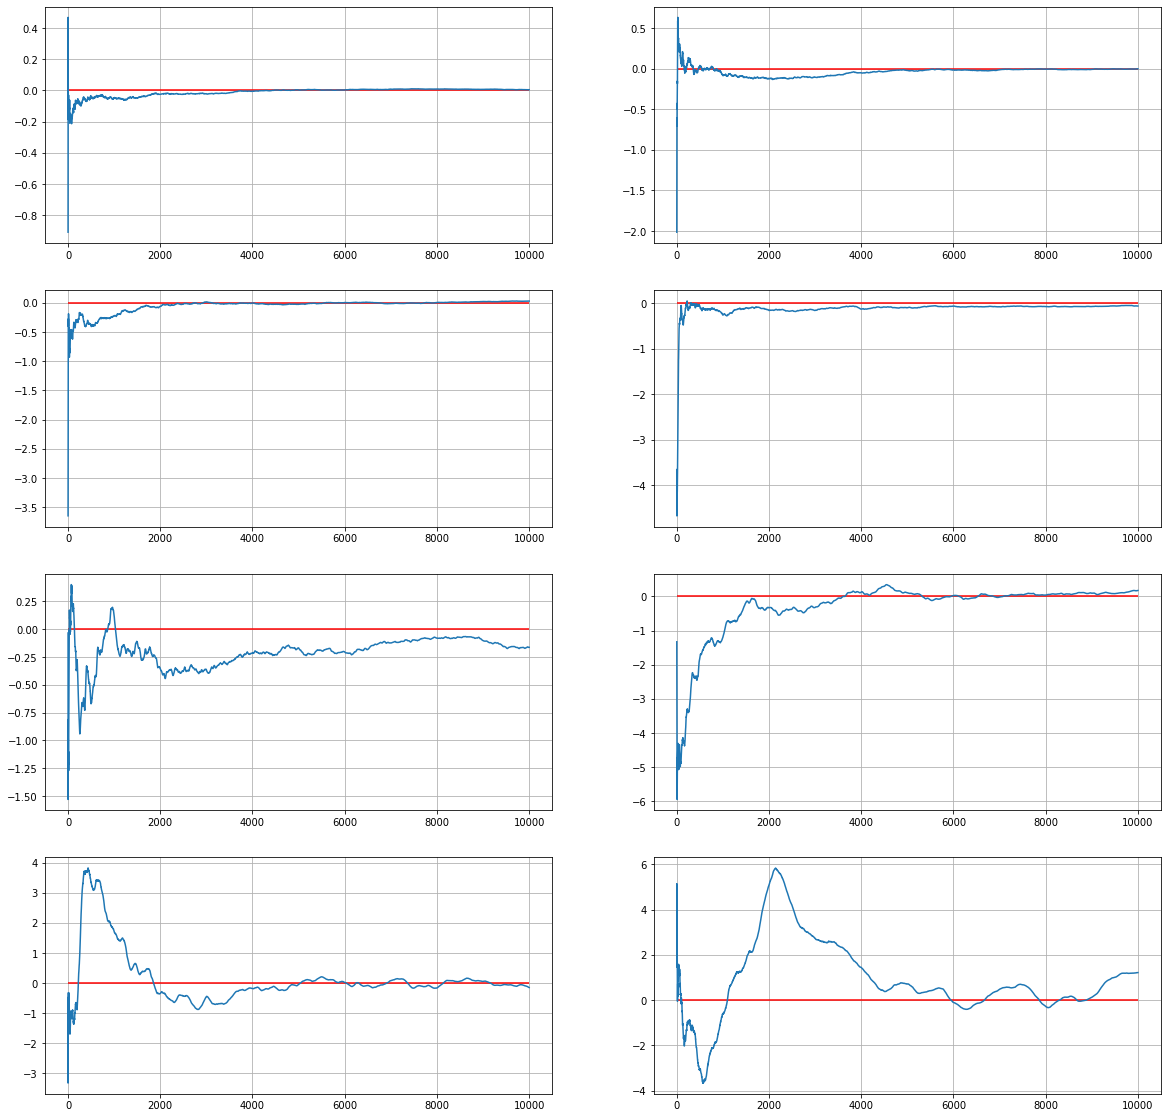

In [4]:
from scipy.stats import norm


N = np.arange(1, 10001)

def create_kci(i, j):
    e = norm.rvs(size=i + j + 1)
    u = uniform.rvs(0, 1, size=j + 1)
    
    eps_matrix = np.zeros((i, j + 1))
    for p in range(i):
        c = e[i - p:j + i - p + 1]   
        eps_matrix[p] = c

    return eps_matrix.dot(u)


f = plt.figure(figsize=(20, 20))
 
lst = [1, 3, 5, 10, 25, 50, 100, 500]

for i, m in enumerate(lst, 1):
    kci = create_kci(10000, m)
    plt.subplot(4, 2, i)

    a = kci.cumsum() / N

    plt.plot(N, a)
    plt.grid() 
    plt.hlines(0, 0, 10000, color='r')
plt.show()

## 2 Метод Монте-Карло

Метод Монте-Карло полягає в наближеному обчисленні інтегралів за допомогою випадкових величин.
$$
\idotsint_{A} f \left( \overrightarrow{x} \right) \, d\overrightarrow{x} 
= \idotsint_{\mathbf{R^d}} f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= \idotsint_{\mathbf{R^d}}
\frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)}
f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= E \left[ \frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f \left( \overrightarrow{\xi}_i \right) I_{A} \left( \overrightarrow{\xi}_i \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{\xi}_i \right)},
$$
де $f$ &mdash; деяка функція,
$I_B$ &mdash; індикатор множини $B$,
$\overrightarrow{\xi}, \overrightarrow{\xi}_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $C \supset A$
зі щільністю $f_{\overrightarrow{\xi}}$.

Або, в одномірному випадку,
$$
\int_{a}^{b} f(x) \, dx
= \int_{-\infty}^{+\infty} f(x) I_{(a, b)}(x) \, dx
= \int_{-\infty}^{+\infty} \frac{f(x) I_{(a, b)}(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi) I_{(a, b)}(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)},
$$
де $a, b \in \mathbf{R} \cup \{-\infty, +\infty\}$,
$I_B$ &mdash; індикатор множини $B$,
$f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $A \supset (a, b)$ зі щільністю $f_{\xi}$.

Або
$$
\int_{A} f(x) \, dx
= E\left[ f(\xi) \right] m(A)
\approx \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A),
$$
де $f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в., рівномірно розподілені на множині $A$.

### 2.1 Завдання 2.1

Порахуйте наближено $\displaystyle \int_{0}^{1} \sin x \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$
в залежності від $n = 1, \ldots, 1000$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** При розв'язанні даної задачі зручно взяти $\xi_i \sim Uniform(0, 1)$.

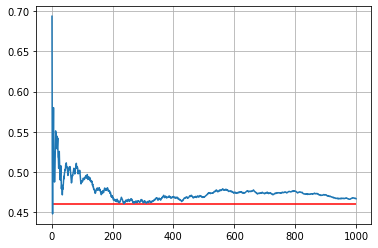

In [5]:
kci = uniform.rvs(size=1000)

sinus = np.sin(kci)

t = np.cos(0) - np.cos(1)
N = np.arange(1, 1001)

a = sinus.cumsum() / N

plt.plot(N, a)
plt.hlines(t, 0, 1000, 'r')
plt.grid()
plt.show()


### 2.2 Завдання 2.2

Порахуйте наближено $\displaystyle \int_{1}^{\infty} \frac{1}{x^3} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim Exp(1)$.
2. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
3. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.
4. Порівняйте точність наближення з пунктів $1, 2$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** Замість введення індикатора можна взяти такі $\xi_i$, що $(\xi_i - 1) \sim Exp(1)$.
Тобто поставити параметр `loc=1`.
Тоді
$$
\int_{1}^{\infty} f(x) \, dx
= \int_{1}^{\infty} \frac{f(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i)}{f_{\xi}(\xi_i)}.
$$

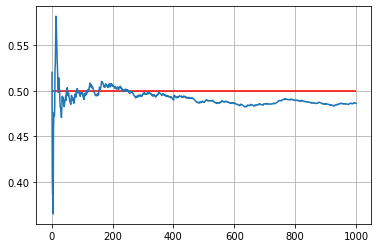

In [6]:
from scipy.stats import expon


kci = expon.rvs(loc=1, size=1000)

f = 1 / (kci ** 3)
N = np.arange(1, 1001)

res = f / expon.pdf(kci, loc=1)
result = res.cumsum() / N

plt.plot(N, result)
plt.hlines(0.5, 0, 1000, 'r')
plt.grid()
plt.show()

### 2.3 Завдання 2.3

Порахуйте наближено $\displaystyle \int_{-\infty}^{+\infty} e^{-|x|} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

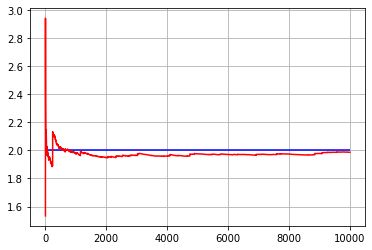

In [7]:
n = norm.rvs(size = 10000)
f = np.exp(-np.abs(n))

res = f / norm.pdf(n)
N = np.arange(1, 10001)


a = res.cumsum() / N
plt.plot(N, a, color = 'red')
plt.hlines(2, 1, 10000, 'b')
plt.grid()
plt.show()

## 3 Центральна гранична теорема

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu, D(\xi_1) = \sigma^2$.
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.
Тоді
$$
\sqrt{n} \left( \frac{S_n}{n} - \mu \right) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu) \to \zeta,
\qquad n \to \infty,
$$
де $\zeta \sim N(0, \sigma^2)$.

### 3.1 Експоненційний розподіл

Нехай $(\xi_k, k \geq 1)$ &mdash; н.о.р.в.в., де $\xi_k \sim Exp(1), k \geq 1$.

Зобразіть графічно збіжність із центральної граничної теореми.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 200$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu)$, де $\mu = E[\xi_1]$;
- графік функції щільності $\zeta \sim N(0, \sigma^2)$, де $\sigma^2 = D(\xi_1)$.

**Зауваження.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функцію `numpy.sum(axis=1)`.

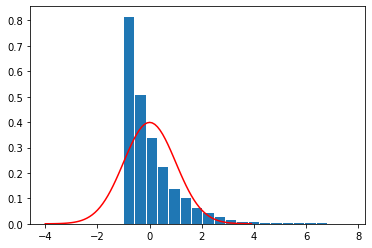

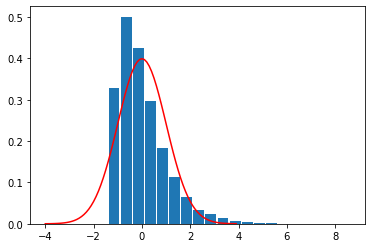

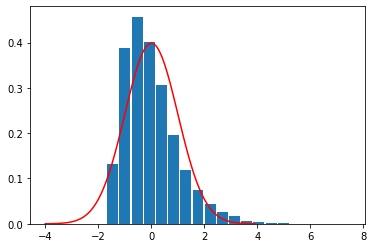

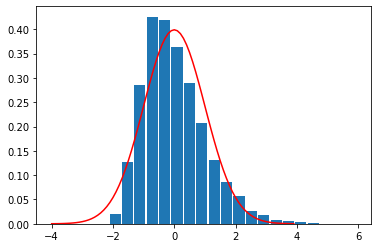

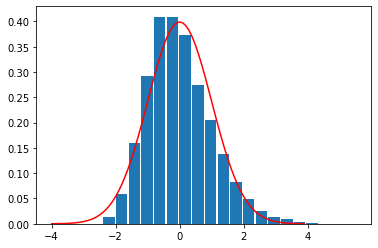

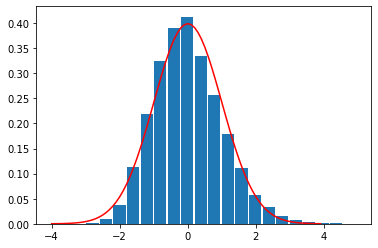

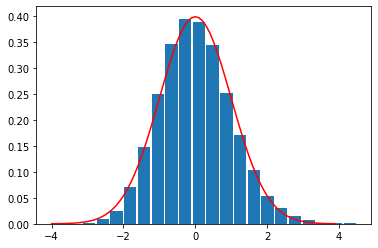

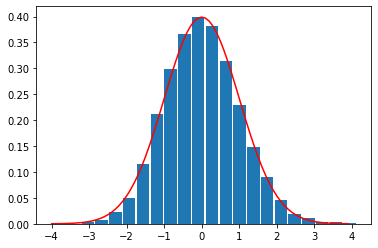

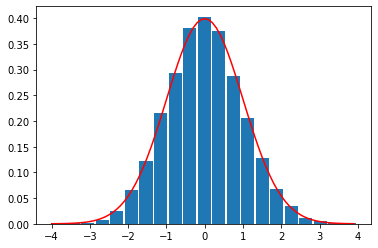

In [8]:
def get_xi(n, r, samples=10000):
    res = []
    for i in range(samples):
        res.append(r.rvs(size=n))
    return np.matrix(res)

e = expon(0, 1)
matrix = get_xi(200, e)

n = [1, 2, 3, 5, 10, 25, 50, 100, 200]
x = np.arange(-4, 4, 0.1)

for i in n:
    tmp = matrix[:,:i]
    val = (tmp.sum(axis=1) - i) / (np.sqrt(i))

    plt.hist(val, rwidth=0.9, density=True, bins=20)
    plt.plot(x, norm(0, 1).pdf(x), 'r')
    plt.show()

### 3.2 Задача 1.23.24

Випадкові величини $(\xi_k, k \geq 1)$ невід'ємні незалежні однаково розподілені, $E[\xi_1] = 1, D(\xi_1) = \sigma^2$.
Довести, що
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)
\xrightarrow{w} \sigma \zeta \sim N(0, \sigma^2), \quad n \to \infty$.

Нехай $\xi_k \sim Exp(1)$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)$;
- графік функції щільності $\sigma \zeta \sim N(0, \sigma^2)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.sum(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

**Зауваження 3.** Якщо $\sigma \zeta \sim N(0, \sigma^2)$, то $\zeta \sim N(0, 1)$.

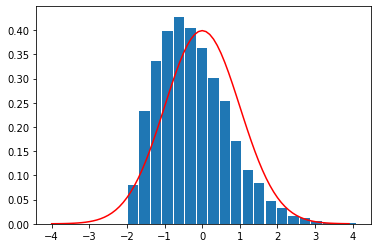

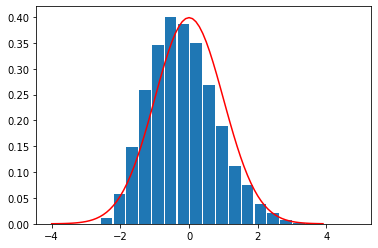

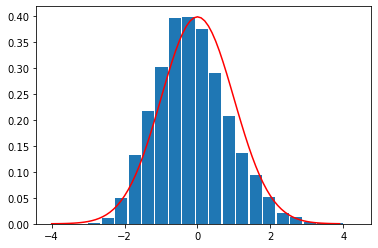

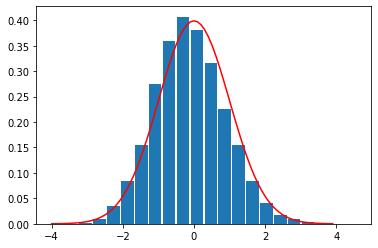

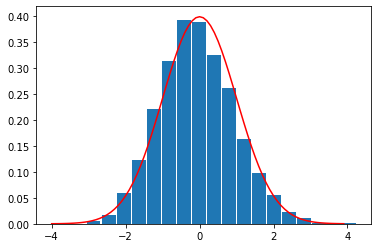

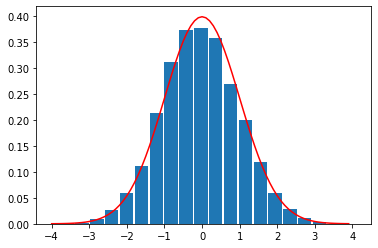

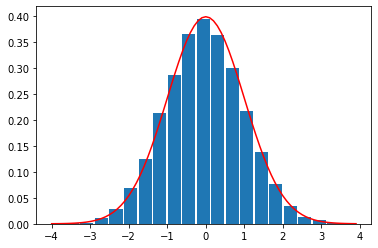

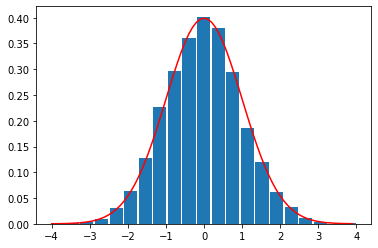

In [9]:
e = expon(0, 1)
matrix = get_xi(100, e)

n = [1, 2, 3, 5, 10, 25, 50, 100]
x = np.arange(-4, 4, 0.1)
nrm = norm(0, 1)

for i in n:
    tmp = matrix[:,:i]
    v = 2 * (np.sqrt(tmp.sum(axis=1)) - np.sqrt(i))

    plt.hist(v, rwidth=0.9, density=True, bins=20)
    plt.plot(x, nrm.pdf(x), 'r')
    plt.show()

### 3.3 Задача 1.18.35

Випадкові величини $(\xi_k, k \geq 1)$ незалежні рівномірно розподілені:
$\xi_k \sim Uniform(0, 1), \xi_{(1:n)} = \min_{1 \leq k \leq n} \xi_k, \xi_{(n:n)} = \max_{1 \leq k \leq n} \xi_k$.
Довести, що:
$\displaystyle
\xi_{(1:n)} \xrightarrow{P} 0,
\xi_{(n:n)} \xrightarrow{P} 1,
n \xi_{(1:n)} \xrightarrow{P} \zeta,
n \left( 1 - \xi_{(n:n)} \right) \xrightarrow{P} \zeta,
\quad n \to \infty$, де $\zeta \sim Exp(1)$.

Зобразіть графічно описані в задачі збіжності.

1. Реалізуйте 2 сабплоти в 1 рядку.
2. На першому сабплоті:
   - Зобразіть графік функції $\xi_{(1:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(1:n)}$.
3. На другому сабплоті:
   - Зобразіть графік функції $\xi_{(n:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(n:n)}$.
4. Для кожного $n = 1, 2, 3, 5, 10$ реалізуйте два сабплоти:
   1. На першому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \xi_{(1:n)}$;
      - графік функції щільності $\zeta \sim Exp(1)$.
   2. На другому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \left( 1 - \xi_{(n:n)} \right)$;
      - графік функції щільності $\zeta \sim Exp(1)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функції `numpy.minimum.accumulate` та `numpy.maximum.accumulate`.

**Зауваження 2.** $\xrightarrow{P}$ означає *збіжність за ймовірністю*.

**Зауваження 3.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.min(axis=1)` та `numpy.max(axis=1)`.

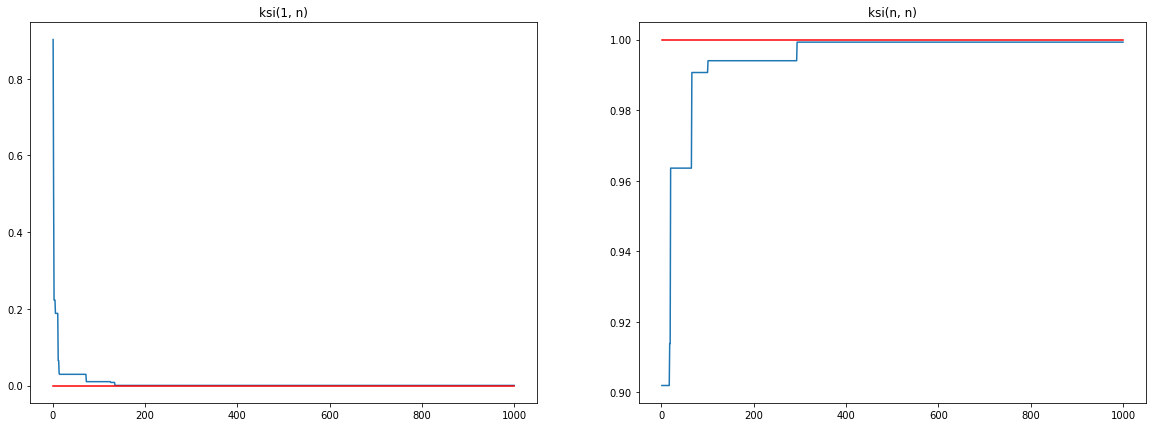

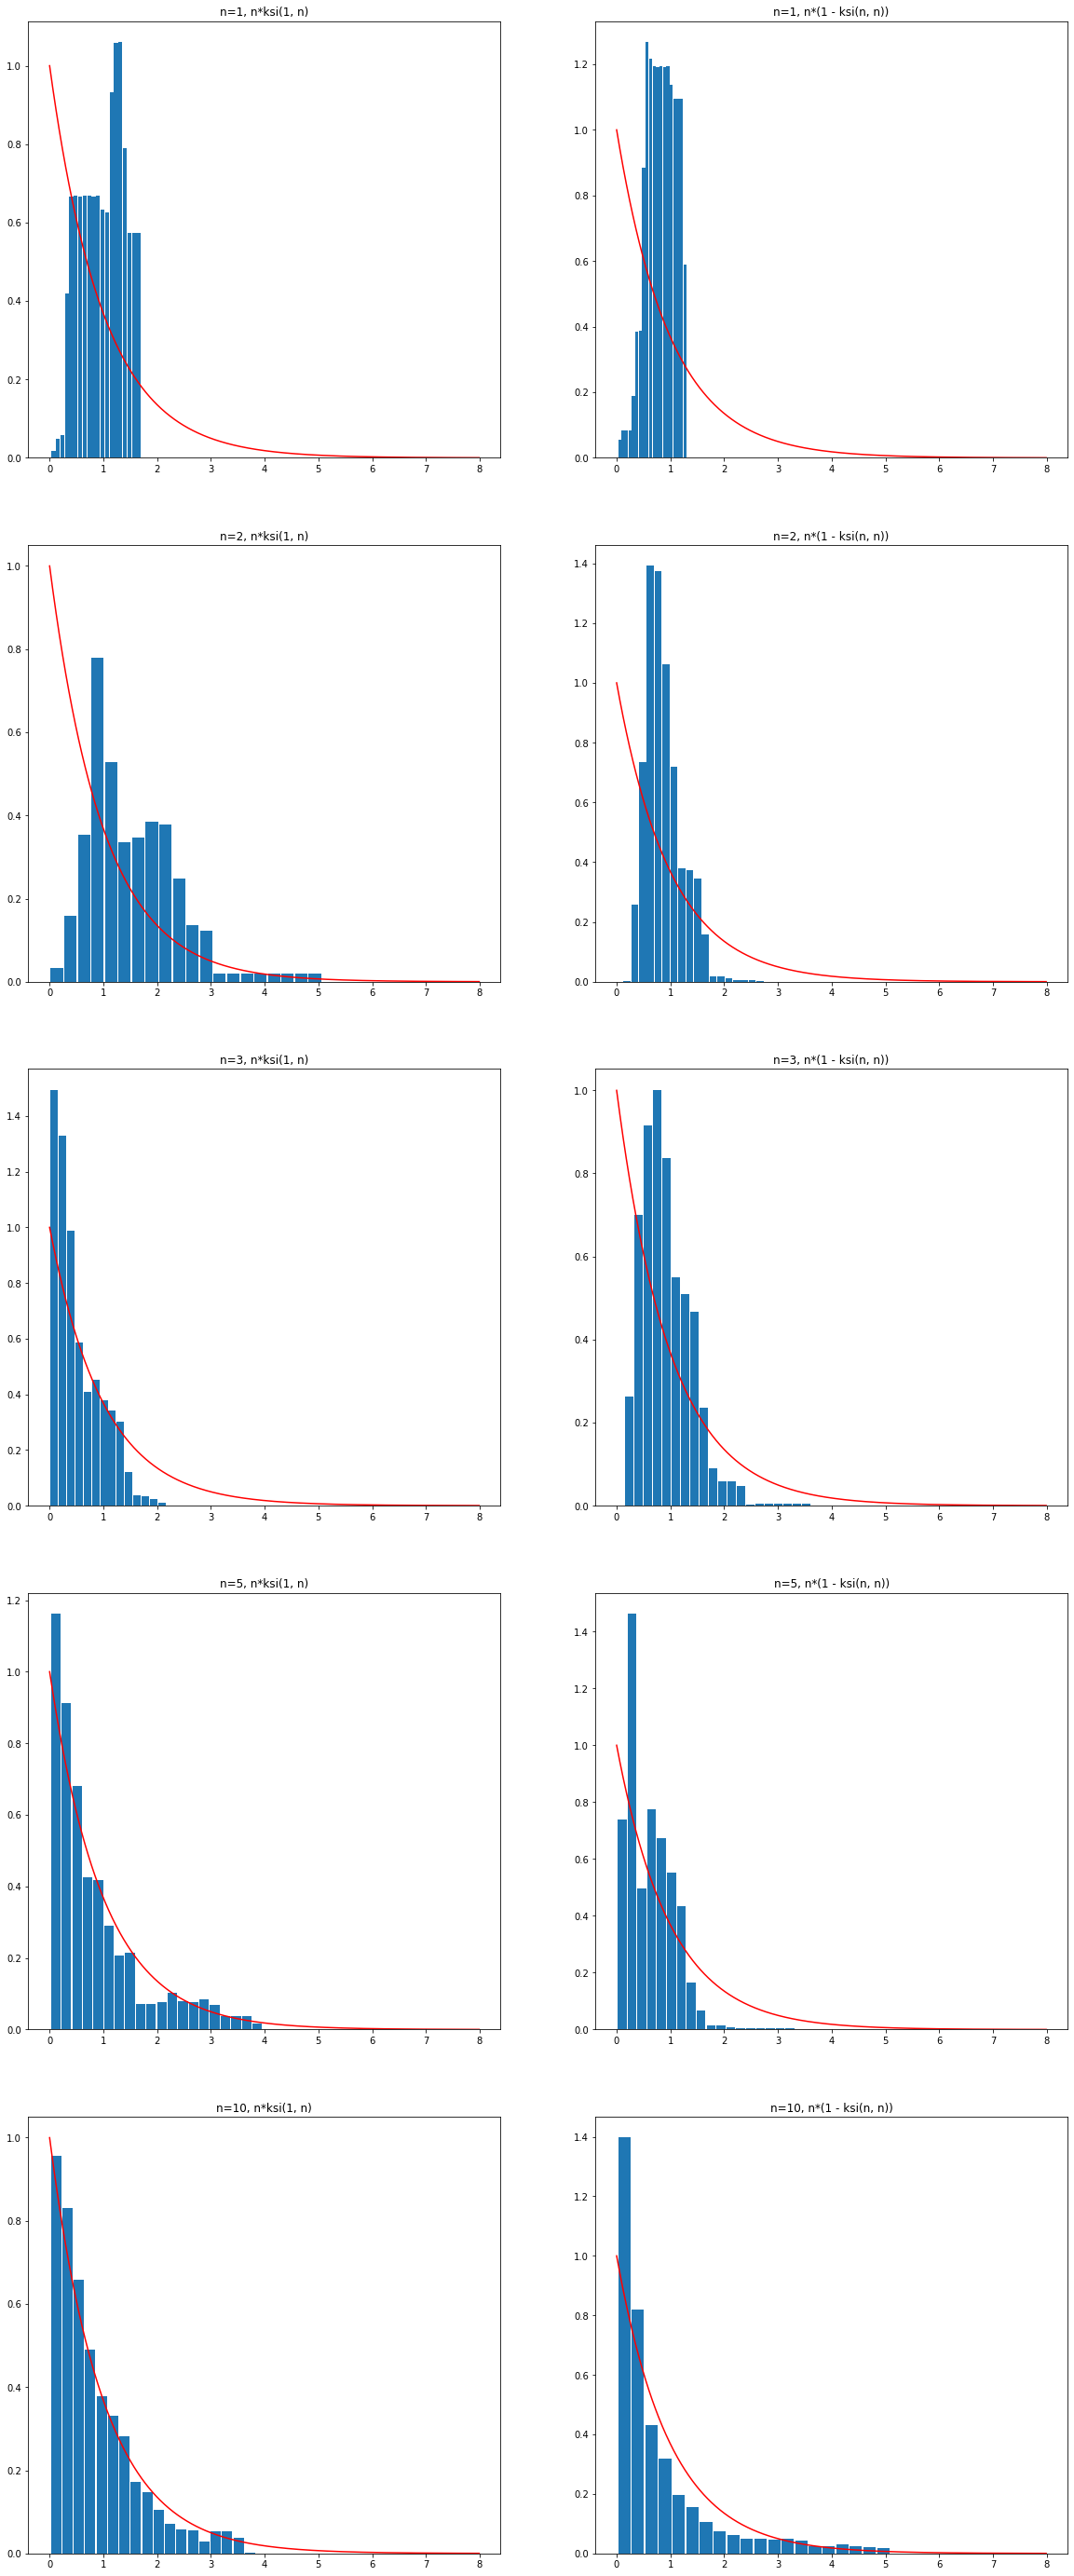

In [10]:
def ksi1(ksi):
    res = ksi[0] + 1
    for i, el in enumerate(ksi):
        res = min(res, el)
        yield res
        
def ksin(ksi):
    res = ksi[0] - 1
    for i, el in enumerate(ksi):
        res = max(res, el)
        yield res

f = plt.figure(figsize = [20, 7])

ax1 = f.add_subplot(121)
ax1.set_title("ksi(1, n)")

ax2 = f.add_subplot(122)
ax2.set_title("ksi(n, n)")

rvs = uniform(0, 1).rvs(size=1000)

x = np.arange(1, 1001)
y = list(ksi1(rvs))

ax1.plot(x, y)
ax1.plot([1, 1000], [0, 0], 'r')

y = list(ksin(rvs))

ax2.plot(x,y)
ax2.plot([1, 1000], [1, 1], 'r')

plt.show()

def n_ksi1(ksi):
    res = ksi[0] + 1
    for i, el in enumerate(ksi):
        res = min(res, el)
        yield res * (i + 1)

def n_ksin(ksi):
    res = ksi[0] - 1
    for i, el in enumerate(ksi):
        res = max(res, el)
        yield (1 - res) * (i + 1)

f = plt.figure(figsize=[20, 50])
i = 1

n = [1, 2, 3, 5, 10]

x = np.arange(0, 8, 0.01)

for el in n:
    ax = f.add_subplot(5, 2, i)
    ax.set_title("n={}, n*ksi(1, n)".format(el))
    samples = []
    
    for j in range(el):
        samples += list(n_ksi1(uniform(0, 1).rvs(size=10000)))

    ax.hist(samples, bins=20, density=True, rwidth=0.9)
    ax.plot(x, expon(0, 1).pdf(x), color='r')
    
    ax = f.add_subplot(5, 2, i + 1)
    ax.set_title("n={}, n*(1 - ksi(n, n))".format(el))
    
    samples = []
    
    for j in range(el):
        samples += list(n_ksin(uniform(0, 1).rvs(size=10000)))
    ax.hist(samples, bins=20, density=True, rwidth=0.9)
    ax.plot(x, expon(0, 1).pdf(x), color='r')
    i += 2

plt.show()